In [179]:
# preprocessing
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# models
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import LassoLarsCV

# success
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

import matplotlib.pyplot as plt

# Preprocessing

In [34]:
df = pd.read_csv("movie_data/cleaned_data.csv", index_col="id").drop("title", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5255 entries, 862 to 63281
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          5255 non-null   int64  
 1   revenue             5255 non-null   float64
 2   vote_average        5255 non-null   float64
 3   budget              5255 non-null   float64
 4   runtime             5255 non-null   float64
 5   original_language   5255 non-null   object 
 6   is_franchise        5255 non-null   bool   
 7   genre               5255 non-null   object 
 8   production_company  5255 non-null   object 
 9   country             5255 non-null   object 
 10  release_month       5255 non-null   int64  
 11  release_year        5255 non-null   int64  
 12  actor_1             5255 non-null   object 
 13  actor_2             5255 non-null   object 
 14  actor_3             5255 non-null   object 
 15  Director            5255 non-null   object 
 16  Pro

In [35]:
df.iloc[:,5:] = df.iloc[:,5:].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5255 entries, 862 to 63281
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Unnamed: 0          5255 non-null   int64   
 1   revenue             5255 non-null   float64 
 2   vote_average        5255 non-null   float64 
 3   budget              5255 non-null   float64 
 4   runtime             5255 non-null   float64 
 5   original_language   5255 non-null   category
 6   is_franchise        5255 non-null   category
 7   genre               5255 non-null   category
 8   production_company  5255 non-null   category
 9   country             5255 non-null   category
 10  release_month       5255 non-null   category
 11  release_year        5255 non-null   category
 12  actor_1             5255 non-null   category
 13  actor_2             5255 non-null   category
 14  actor_3             5255 non-null   category
 15  Director            5255 non-null  

In [36]:
df = df.iloc[: , 1:]
df.head()

,revenue,vote_average,budget,runtime,original_language,is_franchise,genre,production_company,country,release_month,release_year,actor_1,actor_2,actor_3,Director,Producer,Screenwriter,keyword
id,,,,,,,,,,,,,,,,,,
862,373554033.0,7.7,30000000.0,81.0,en,True,Animation,Pixar Animation Studios,United States of America,10,1995,Tom Hanks,Tim Allen,Don Rickles,John Lasseter,Bonnie Arnold,Joss Whedon,jealousy
8844,262797249.0,6.9,65000000.0,104.0,en,False,Adventure,TriStar Pictures,United States of America,12,1995,Robin Williams,Jonathan Hyde,Kirsten Dunst,Joe Johnston,Larry J. Franco,Jonathan Hensleigh,board game
31357,81452156.0,6.1,16000000.0,127.0,en,False,Comedy,Twentieth Century Fox Film Corporation,United States of America,12,1995,Whitney Houston,Angela Bassett,Loretta Devine,Forest Whitaker,Ronald Bass,Ronald Bass,based on novel
949,187436818.0,7.7,60000000.0,170.0,en,False,Action,Regency Enterprises,United States of America,12,1995,Al Pacino,Robert De Niro,Val Kilmer,Michael Mann,Art Linson,Michael Mann,robbery
9091,64350171.0,5.5,35000000.0,106.0,en,False,Action,Universal Pictures,United States of America,12,1995,Jean-Claude Van Damme,Powers Boothe,Dorian Harewood,Peter Hyams,Moshe Diamant,Karen Elise Baldwin,terrorist


In [111]:
mask = (df["revenue"] > 1000) & (df["budget"] > 1000)
df = df[mask]

In [112]:
df_dummies = pd.get_dummies(df)
df_dummies.head()

,revenue,vote_average,budget,runtime,original_language_af,original_language_bm,original_language_ca,original_language_cn,original_language_da,original_language_de,...,keyword_writer,keyword_writing,keyword_wyoming,keyword_yacht,keyword_yakuza,keyword_yuppie,keyword_zombie,keyword_zoo,keyword_любовь,keyword_绝地奶霸
id,,,,,,,,,,,,,,,,,,,,,
862,373554033.0,7.7,30000000.0,81.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8844,262797249.0,6.9,65000000.0,104.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31357,81452156.0,6.1,16000000.0,127.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
949,187436818.0,7.7,60000000.0,170.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9091,64350171.0,5.5,35000000.0,106.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Lasso

In [113]:
X = df_dummies.drop(["revenue", "vote_average"], axis=1)
y = df_dummies["revenue"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=29)

In [114]:
lasso_model = LassoCV(normalize=True, cv=10, random_state=29).fit(X_train, y_train)


In [115]:
y_pred = lasso_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

126578840.98537637

In [116]:
explained_variance_score(y_test, y_pred)

0.5561837856595734

In [117]:
coefs = pd.Series(lasso_model.coef_)
coef_idx = coefs[coefs != 0].index

In [128]:
pd.DataFrame(X.columns[coef_idx])[:5]

,0
0,budget
1,runtime
2,is_franchise_False
3,is_franchise_True
4,genre_Animation


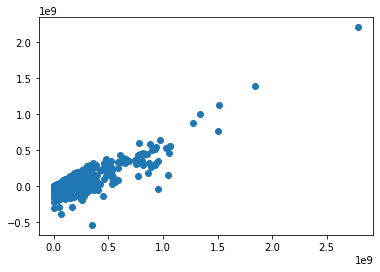

In [162]:
resids = y_test - y_pred
df_resids = pd.DataFrame({"resids" : resids, "revenue" : y_test})
df_resids.sort_values(by="revenue", inplace=True)
plt.scatter(df_resids["revenue"], df_resids["resids"])

In [164]:
np.abs(resids).sort_values(ascending=False)

id
19995     2.204306e+09
597       1.392666e+09
135397    1.126398e+09
12445     1.008223e+09
109445    8.791768e+08
              ...     
476       6.927095e+04
25853     6.230219e+04
336882    2.334875e+04
34586     1.769944e+04
599       1.369321e+04
Name: revenue, Length: 1560, dtype: float64

# Log tranform Lasso?

In [129]:
# try log transform? 
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)
lasso_log_model = LassoCV(normalize=True, cv=10, random_state=29).fit(X_train, y_train_log)

In [152]:
y_log_pred = lasso_log_model.predict(X_test)
y_backtrans = np.exp(y_log_pred)
np.sqrt(mean_squared_error(y_test, y_backtrans))

1528590797.0984702

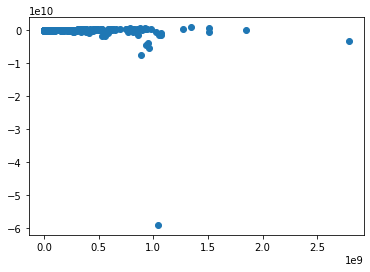

In [153]:
resids = y_test - y_backtrans
plt.scatter(y_test, resids)

In [158]:
resids = pd.DataFrame({"rev" : y_test, "resid" : resids})

In [160]:
resids.sort_values(by="resid")

,rev,resid
id,,
1865,1.045714e+09,-5.903603e+10
559,8.908716e+08,-7.368543e+09
57158,9.584000e+08,-5.253429e+09
767,9.339592e+08,-4.324460e+09
12444,9.543059e+08,-3.910015e+09
...,...,...
672,8.766885e+08,5.985476e+08
293660,7.831130e+08,6.578388e+08
121,9.262874e+08,6.863077e+08


In [166]:
explained_variance_score(y_test_log, y_log_pred)

0.42497721742231753

# Ridge

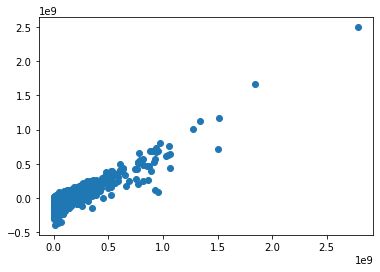

In [168]:
ridge_model = RidgeCV(normalize=True, cv=10).fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, y_pred)))
print(explained_variance_score(y_test, y_pred))

resids = y_test - y_pred
df_resids = pd.DataFrame({"resids" : resids, "revenue" : y_test})
df_resids.sort_values(by="revenue", inplace=True)
plt.scatter(df_resids["revenue"], df_resids["resids"])

In [169]:
explained_variance_score(y_test, y_pred)

0.38426129012340504

In [170]:
np.sqrt(mean_squared_error(y_test, y_pred))

148657064.45427877

# Elastic Net

In [172]:
EN_model = ElasticNetCV(normalize=True, cv=10).fit(X_train, y_train)

In [173]:
y_pred = EN_model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, y_pred)))
print(explained_variance_score(y_test, y_pred))

189419304.0859634
5.906628943730396e-07


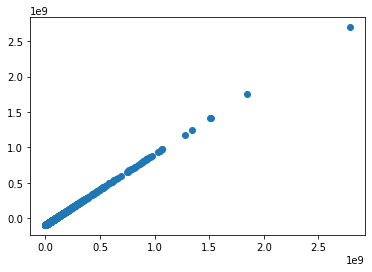

In [174]:
resids = y_test - y_pred
plt.scatter(y_test, resids)

In [175]:
coefs = pd.Series(EN_model.coef_)

array([ 4.03248254e-07,  1.87448178e-01,  0.00000000e+00, ...,
        2.99815469e+00, -4.29682796e+00,  1.08132587e+01])

In [176]:
coefs[coefs != 0]

0        2.178386e+00
1        1.844503e+05
39      -5.659304e+07
40       9.296653e-09
43       1.091476e+07
             ...     
16135    1.645449e+08
16149    2.303678e+08
16821    1.191492e+08
16947    2.310783e+06
18384    1.220056e+08
Length: 112, dtype: float64

In [178]:
resids.sort_values()

id
81048    -9.251584e+07
333386   -9.251293e+07
158916   -9.251131e+07
13856    -9.251022e+07
38850    -9.251015e+07
              ...     
12445     1.249482e+09
168259    1.413731e+09
135397    1.421011e+09
597       1.752517e+09
19995     2.695447e+09
Name: revenue, Length: 1560, dtype: float64